In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#EDA and Data visualization

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

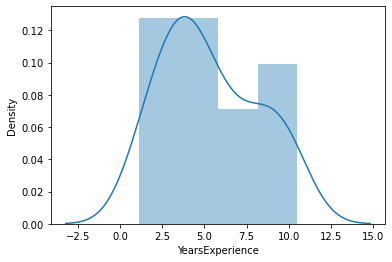

In [5]:
sn.distplot(dataset['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

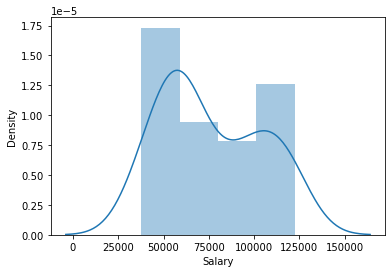

In [6]:
sn.distplot(dataset['Salary'])

In [7]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

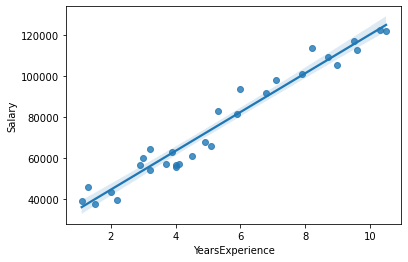

In [8]:
sn.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [9]:
#Model Building

In [10]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [11]:
#Model testing
#Finding coefficient parameters

In [12]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
#Finding pvalues and tvalues

In [14]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [15]:
#Finding Rsquared values

In [16]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [17]:
#Model predictions
#Manual prediction for say 3 years experience

In [18]:
Salary=(25792.200199)+(9449.962321)*(3)
Salary

54142.087162

In [19]:
#Automatic prediction for say 3&5 years experience

In [20]:
new_data=pd.Series([3,5])

In [21]:
new_data

0    3
1    5
dtype: int64

In [22]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [23]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [24]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        21:11:04   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#As you can notice in the above model
#The R-squared and Adjusted R-squared scores are above 0.85.
#(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
#F-statitics is quite high as well and yes desire it to be higher
#But log-likelihood is quite very low far away from 0
#and AIC and BIC score are much higher for this model
#Lets Try some data transformation to check whether these scores can get any better than this.

In [26]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           7.58e-19
Time:                        21:12:21   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#As you can notice in the above model
#The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
#(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
#F-statitics has gotten a little lower for this model than previous.
#But log-likelihood got better than before close to 0 higher than previous model
#and AIC and BIC score are now much better for this model
#Lets Try some data transformation to check whether these scores can get any better than this.

In [28]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           6.37e-18
Time:                        21:13:23   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = dataset).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           7.40e-16
Time:                        21:13:41   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [31]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [32]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [33]:
#Model Validation

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
model1_pred_y =np.square(model1.predict(dataset['YearsExperience']))
model2_pred_y =pow(model2.predict(dataset['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(dataset['YearsExperience']))

In [37]:
model1_rmse =np.sqrt(mean_squared_error(dataset['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(dataset['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(dataset['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174311 
model2= 6232.8154558358565 
model3= 7219.716974372802


In [44]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

In [45]:
#Predicting values

In [48]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = dataset.YearsExperience
predicted2['Salary'] = dataset.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(dataset.YearsExperience))
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
